In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels) = data.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation = "softmax")
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4538 - acc: 0.8472
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4604 - acc: 0.8453
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4441 - acc: 0.8482
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4468 - acc: 0.8497
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4471 - acc: 0.8507
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4441 - acc: 0.8496
Epoch 7/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4525 - acc: 0.8483
Epoch 8/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4406 - acc: 0.8519
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4370 - acc: 0.8521
Epoch 10/10
60000/60000 [==============================] - 4s 74us/sample - loss: 

In [18]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose = 2)
print("Tested Acc: ", test_acc)

10000/10000 - 0s - loss: 0.5786 - acc: 0.8227
Tested Acc:  0.8227


In [23]:
### making a prediction using the model

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
np.argmax(predictions[0])
print(class_names[np.argmax(predictions[0])])

Ankle boot


In [27]:
def plot_image(i, predictions_array,true_label,img):
    predictions_array,true_label,img = predictions_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap= plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label ==true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

In [28]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array,true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color= "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

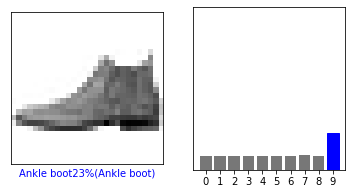

In [29]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()